## This code is to find out the different of each epoch and batch size combination

In [31]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [32]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/mobilenet_v1/fashion_mnist/'
data_path2 = parent_path / 'Data/mobilenet_v1/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/mobilenet_v1/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/mobilenet_v1/cifar100


### extract data

In [33]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [34]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [35]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/mobilenet_v1/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/mobilenet_v1/cifar100/E20_B256_R0
The files are: ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [36]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [37]:
LayersName = ['Smodel_C0', 'Smodel_B1', 'Smodel_R2', 'Smodel_D3', 'Smodel_D4', 'Smodel_D5', 'Smodel_D6', 'Smodel_D7', 'Smodel_D8', 'Smodel_D9', 'Smodel_D10', 'Smodel_D11', 'Smodel_D12', 'Smodel_D13', 'Smodel_D14', 'Smodel_D15', 'Smodel_A16', 'Smodel_F17', 'Smodel_L18']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 19


##### fashionMNIST

The lenth of the layer_means is 19
The lenth of the layer_stds is 19


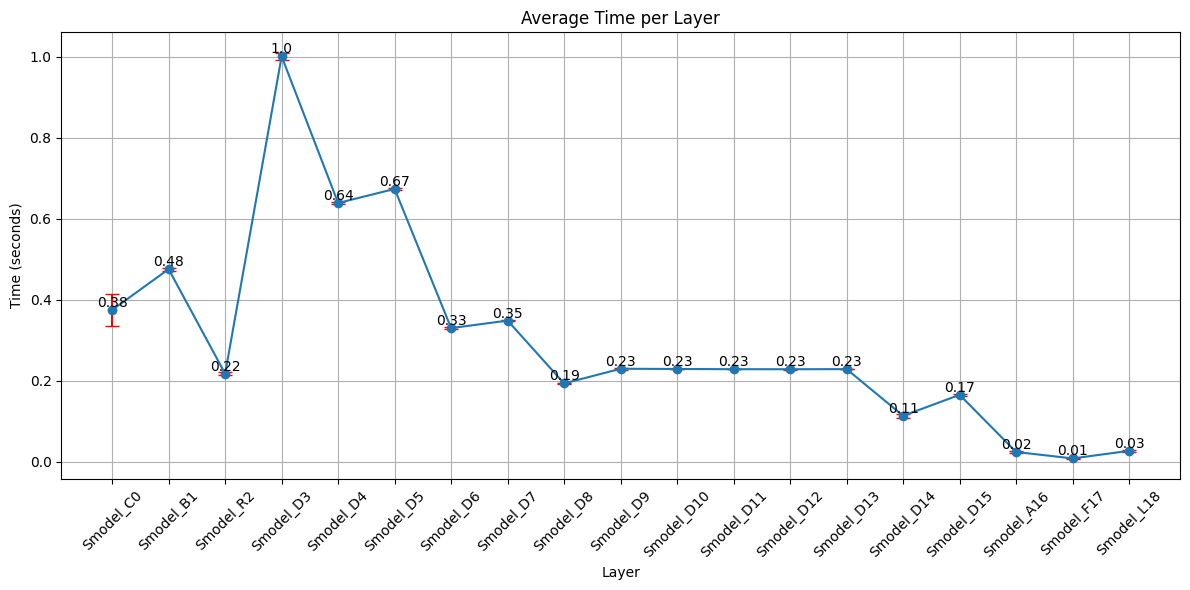

In [38]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)
print(f'The lenth of the layer_means is {len(layer_means)}')
print(f'The lenth of the layer_stds is {len(layer_stds)}')

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [39]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'D' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock[1:]
IncepBlockIndex = IncepBlockIndex[1:]
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['Smodel_D4', 'Smodel_D5', 'Smodel_D6', 'Smodel_D7', 'Smodel_D8', 'Smodel_D9', 'Smodel_D10', 'Smodel_D11', 'Smodel_D12', 'Smodel_D13', 'Smodel_D14', 'Smodel_D15']
The inception block indexes are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [40]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[0.64576459 0.63901854 0.63905597 0.63818192 0.63876534 0.6388855
  0.6393733  0.63969874 0.63889718 0.63908434 0.63914847 0.63831687
  0.63810849 0.63881445 0.64079309 0.63879681 0.6374619  0.63946509
  0.63860393 0.63850951]
 [0.6815896  0.67444468 0.67332029 0.67264962 0.67357039 0.6755538
  0.67385364 0.67382836 0.67358971 0.67322755 0.67345619 0.67379403
  0.67515182 0.67346501 0.67395663 0.67344713 0.67229724 0.67353678
  0.67335725 0.67329359]
 [0.33630919 0.33008862 0.33020854 0.32932901 0.3296206  0.33365893
  0.32997203 0.32993507 0.32994604 0.32960749 0.32953954 0.32992864
  0.33049726 0.3299017  0.33008718 0.33091354 0.32875729 0.32976794
  0.32965994 0.32987595]
 [0.35410142 0.3482585  0.34842873 0.34994149 0.34858823 0.34841228
  0.34880805 0.34878159 0.34870386 0.34864116 0.34830117 0.34859228
  0.34814429 0.34877992 0.34888458 0.34922218 0.34757519 0.34874511
  0.34874201 0.34860277]
 [0.20054436 0.19346642 0.19358158 0.1928525  0.19341254 0.19318

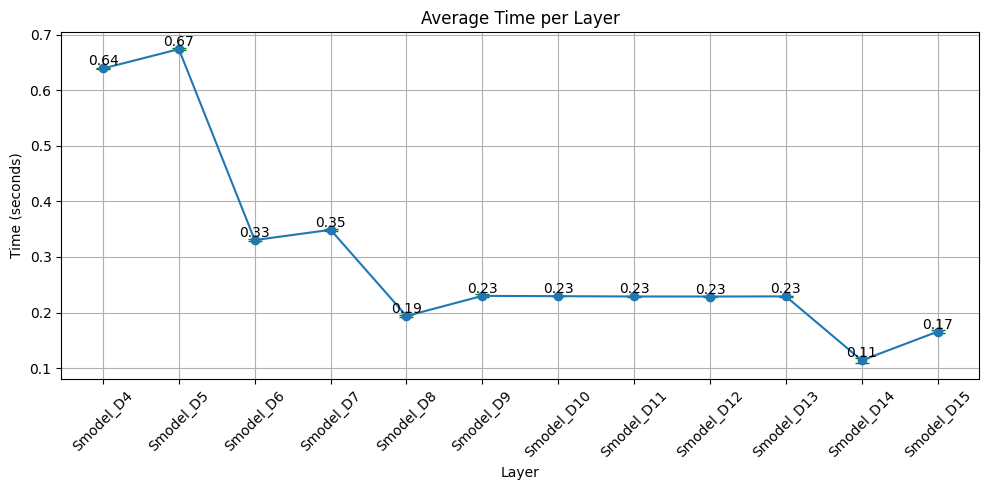

In [41]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

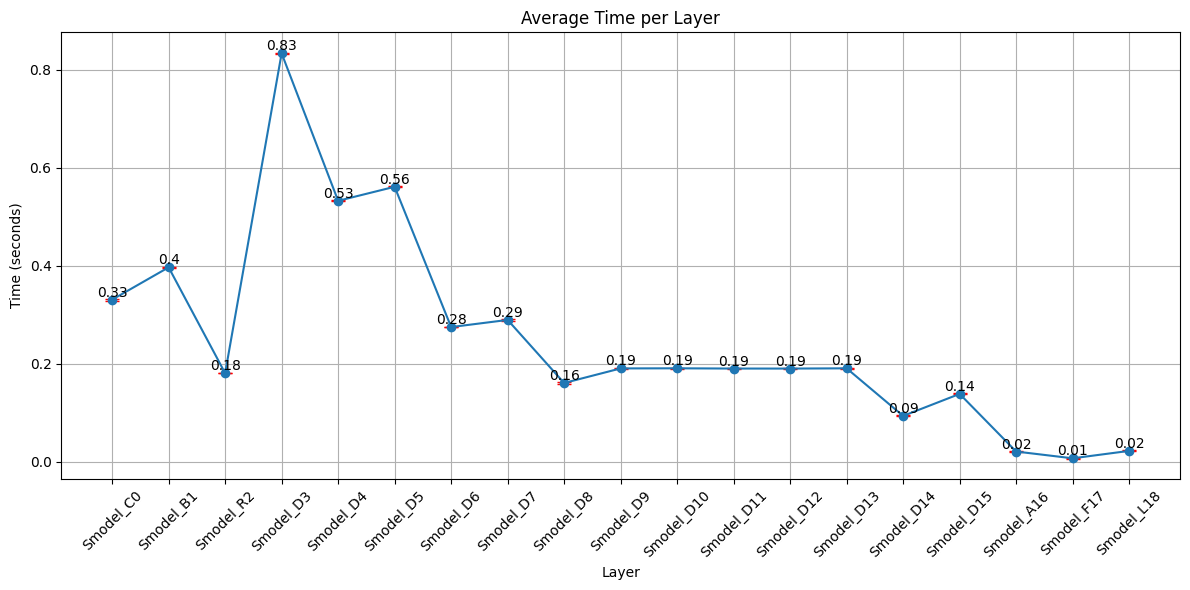

In [42]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [43]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'D' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock[1:]
IncepBlockIndex = IncepBlockIndex[1:]
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['Smodel_D4', 'Smodel_D5', 'Smodel_D6', 'Smodel_D7', 'Smodel_D8', 'Smodel_D9', 'Smodel_D10', 'Smodel_D11', 'Smodel_D12', 'Smodel_D13', 'Smodel_D14', 'Smodel_D15']
The inception block indexes are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [44]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[0.53669357 0.53224897 0.53347325 0.53293824 0.53264427 0.53306413
  0.53279138 0.53246856 0.53200078 0.53290081 0.53267241 0.53230119
  0.53217101 0.53212523 0.53151369 0.533813   0.5324285  0.53263569
  0.5325141  0.53226662]
 [0.56455064 0.56041837 0.56174111 0.56230521 0.56080222 0.5623548
  0.56113005 0.562922   0.56079555 0.56120539 0.56131506 0.56115508
  0.56049252 0.5630157  0.56037498 0.56091523 0.5608685  0.56139612
  0.56159115 0.55992746]
 [0.27827787 0.27453923 0.27595663 0.27536201 0.27468634 0.27561951
  0.27535534 0.27514529 0.27474785 0.27526474 0.27514672 0.2751019
  0.27470255 0.27504873 0.27414155 0.27462816 0.2748189  0.27510381
  0.27482891 0.27366853]
 [0.29266095 0.28841329 0.29564929 0.28940821 0.28936768 0.2898612
  0.28947377 0.29054284 0.28887463 0.28910708 0.29074335 0.2894311
  0.28884578 0.28888655 0.28825521 0.28872013 0.28881884 0.2893827
  0.28895283 0.28769803]
 [0.1643641  0.1600244  0.16358328 0.16098285 0.16084146 0.1615696


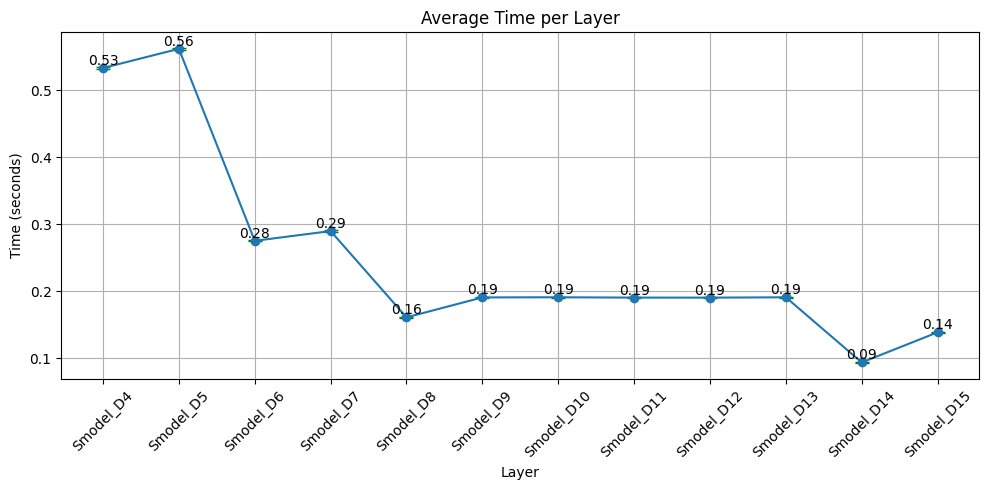

In [45]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [46]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

##### fashionMNIST

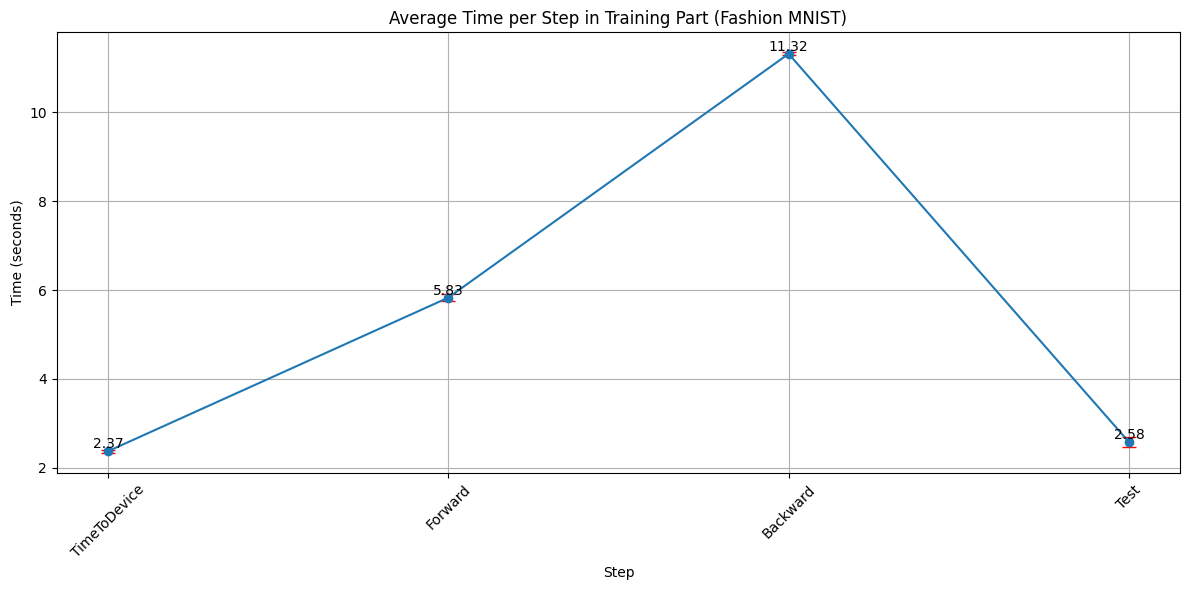

In [47]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Step in Training Part (Fashion MNIST)')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

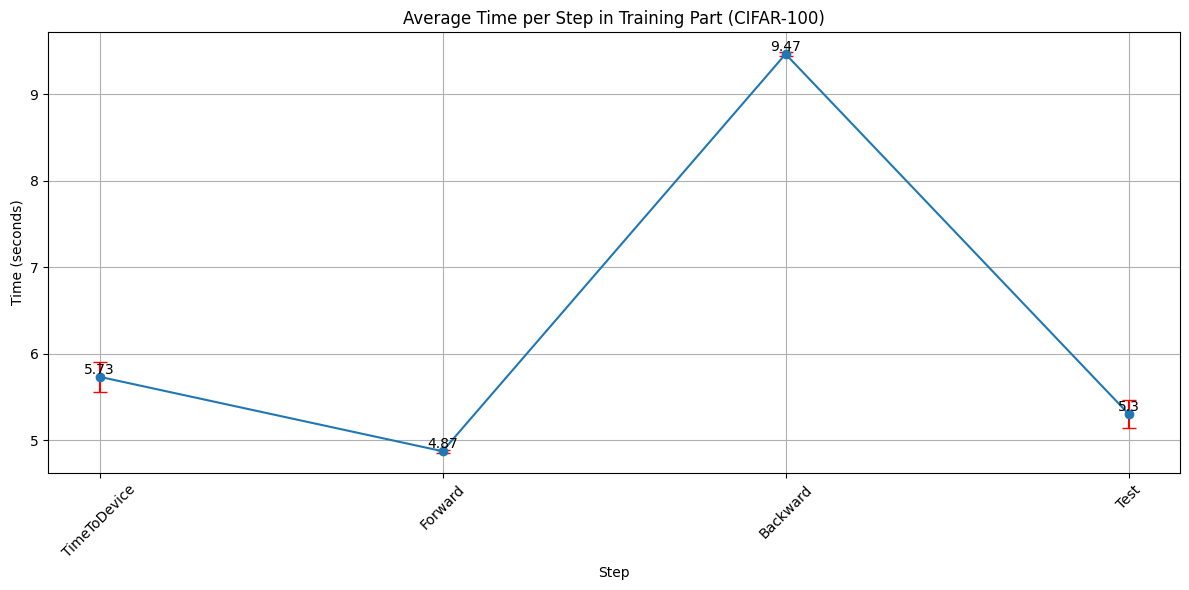

In [48]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Step in Training Part (CIFAR-100)')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [49]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [50]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[6737.2  6944.53 7174.25 7076.75 7096.32 7263.04 7112.88 7323.79 7299.09
  7205.06 7349.77 7238.74 7219.7  7362.7  7201.81 7220.48 7248.71 7180.03
  7222.15 7247.77]]
The average energy per epoch is: [[249.53 267.1  265.71 272.18 272.94 269.   273.57 271.25 270.34 277.12
  272.21 278.41 277.68 272.69 276.99 277.71 278.8  276.15 277.78 278.76]]


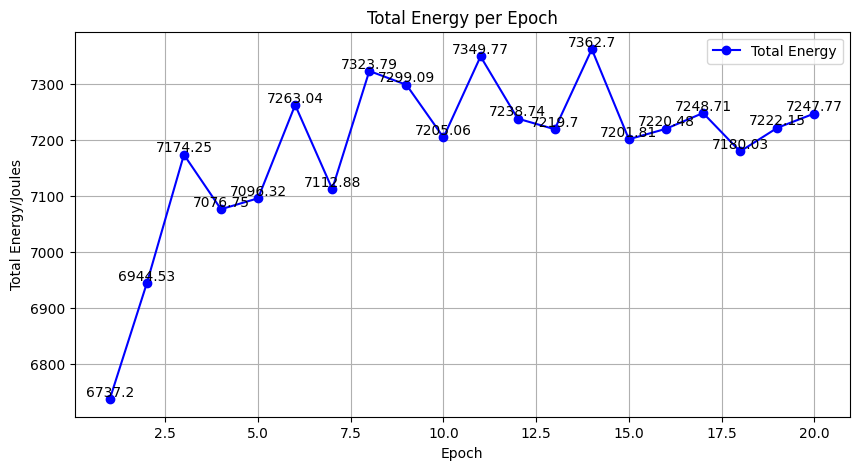

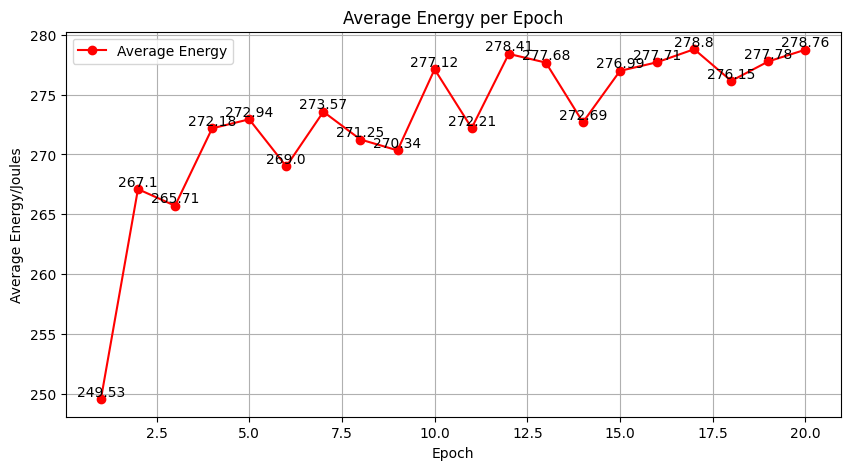

In [51]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [52]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 7186.2384999999995, the standard deviation is: 140.66887890628126


In [53]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 272.796, the standard deviation is: 6.601740225122464


##### cifar100 

In [54]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [55]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[6761.65 6778.22 6907.07 6817.98 6884.83 6859.95 6794.18 6790.72 6745.09
  6819.82 6880.12 6894.26 6828.91 6853.54 6793.96 6824.61 6928.65 6866.91
  6840.66 6696.18]]
The average energy per epoch is: [[198.87 205.4  197.34 200.53 202.5  201.76 205.88 205.78 204.4  200.58
  202.36 202.77 206.94 201.57 205.88 206.81 203.78 201.97 201.2  209.26]]


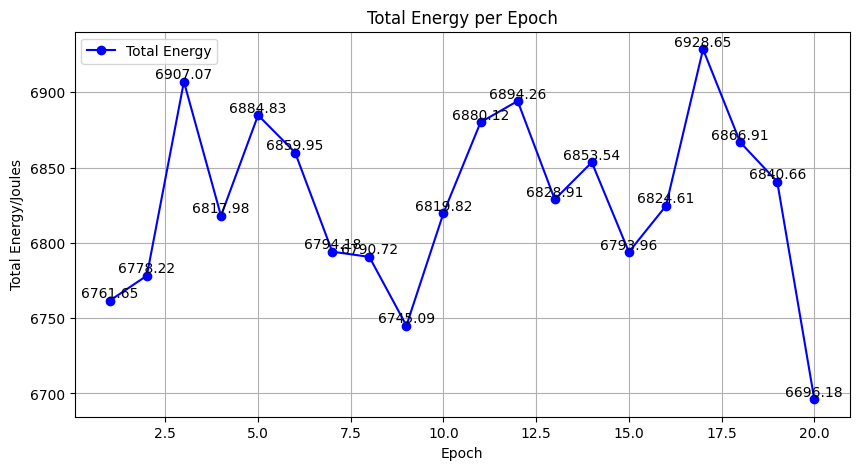

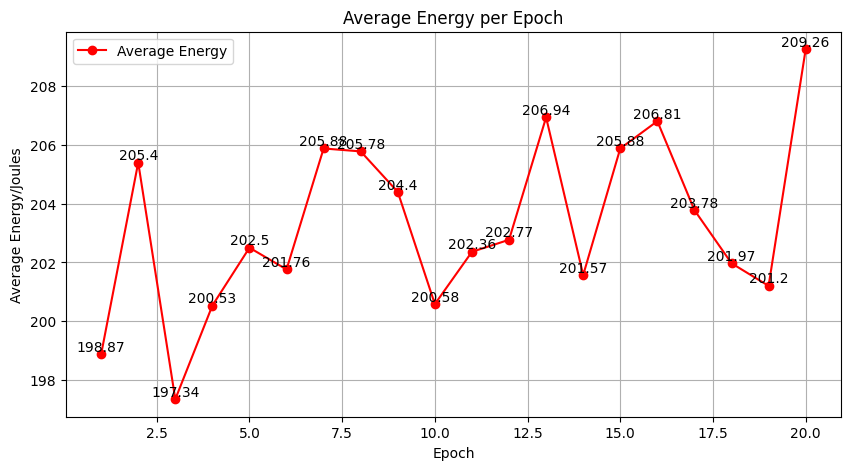

In [56]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

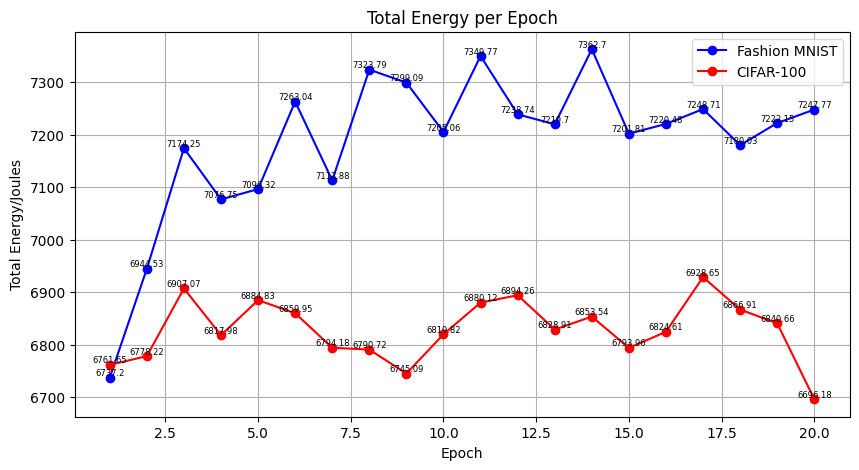

In [57]:
# plot total energy per epoch of two datasets
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Fashion MNIST')
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='CIFAR-100')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point, with smaller font size
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], np.round(totalEpochEnergy_f[0,i], 2), ha='center', va='bottom', fontsize=6)
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom', fontsize=6)
plt.show()

#### EpochTime

##### fashionMNIST

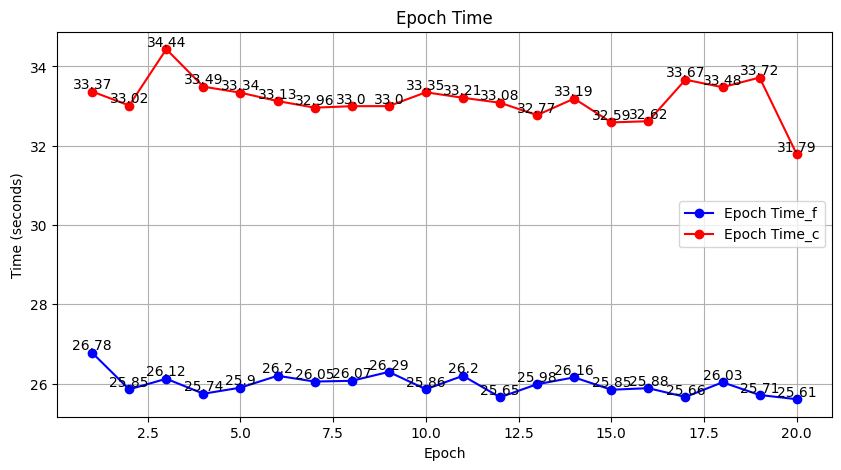

In [58]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [59]:
EpochTime_f

array([26.77842402, 25.85420036, 26.12194252, 25.74384165, 25.89754105,
       26.19690228, 26.0513413 , 26.06963086, 26.2945919 , 25.85745049,
       26.19651961, 25.65498137, 25.9842031 , 26.15632296, 25.845222  ,
       25.88415027, 25.66177988, 26.0325408 , 25.71268559, 25.60550499])

##### cifar100

In [60]:
EpochTime_c

array([33.36835456, 33.01546288, 34.43527412, 33.49090767, 33.33879232,
       33.12760448, 32.96138191, 32.99817109, 32.99953508, 33.34902549,
       33.21031976, 33.08407593, 32.77272463, 33.18981409, 32.58885074,
       32.61937547, 33.6666739 , 33.47672963, 33.72118878, 31.78984571])

#### average energy consumption per step

##### fashionmnist

In [61]:
# calculate the average energy consumption per step in each epoch, and get the round value
EnergyConsumpStep_f = np.round(TrainPartTime_f * avgEpochEnergy_f, 2)
print(f'The shape of the EnergyConsumpStep_f is {EnergyConsumpStep_f.shape}')

The shape of the EnergyConsumpStep_f is (4, 20)


In [62]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_f = np.mean(EnergyConsumpStep_f, axis=1)
EnergyConsumpStepStd_f = np.std(EnergyConsumpStep_f, axis=1)

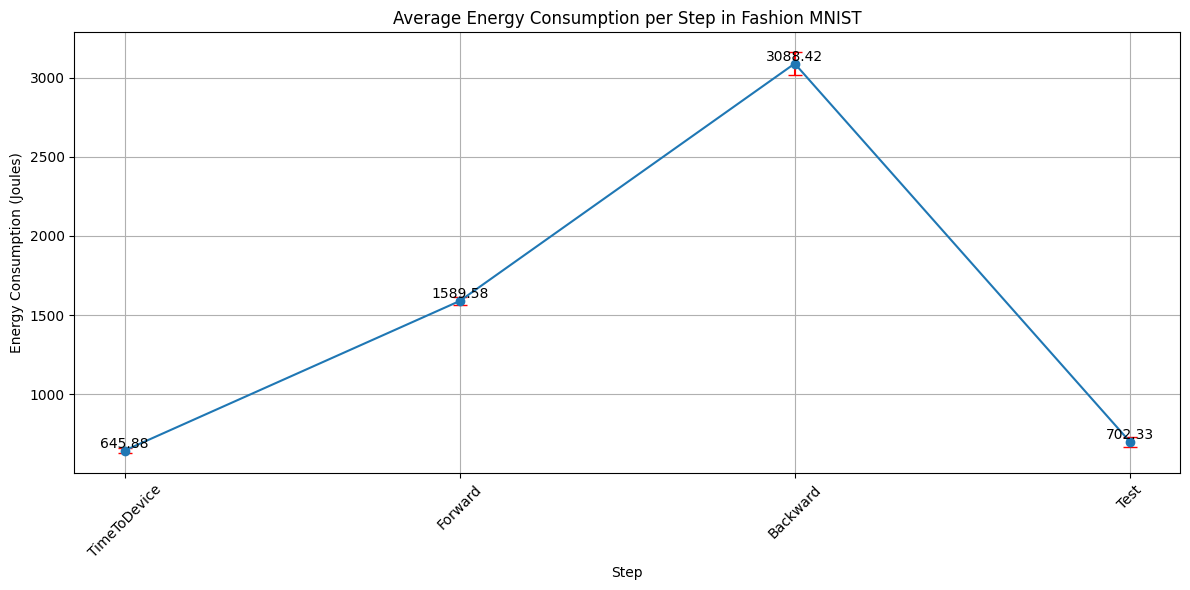

In [63]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_f, yerr=EnergyConsumpStepStd_f, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in Fashion MNIST')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_f[i], np.round(EnergyConsumpStepMean_f[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

In [64]:
EnergyConsumpStep_c = np.round(TrainPartTime_c * avgEpochEnergy_c, 2)

In [65]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_c = np.mean(EnergyConsumpStep_c, axis=1)
EnergyConsumpStepStd_c = np.std(EnergyConsumpStep_c, axis=1)

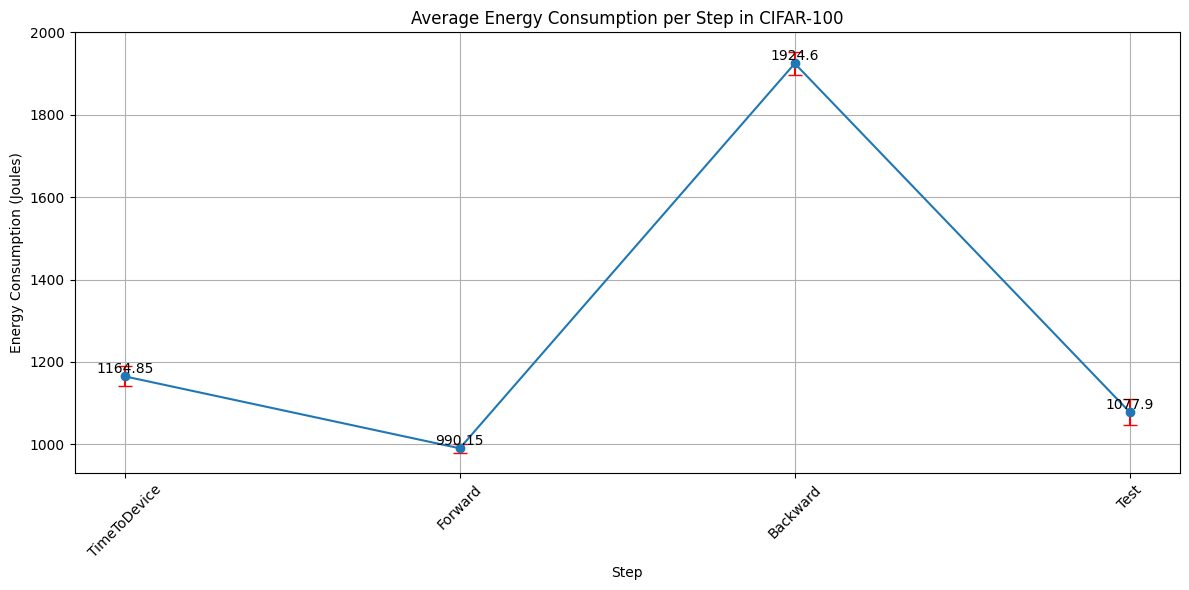

In [66]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_c, yerr=EnergyConsumpStepStd_c, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in CIFAR-100')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_c[i], np.round(EnergyConsumpStepMean_c[i], 2), ha='center', va='bottom')
plt.show()